# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
import matplotlib.pyplot as plt

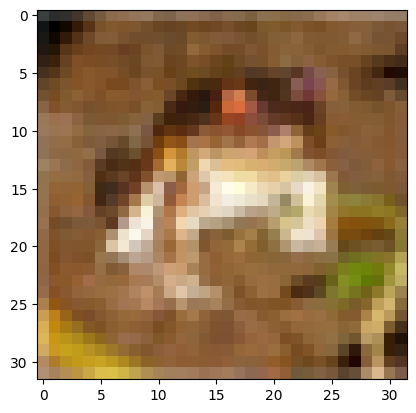

In [5]:
# FROG
plt.imshow(x_train[0])

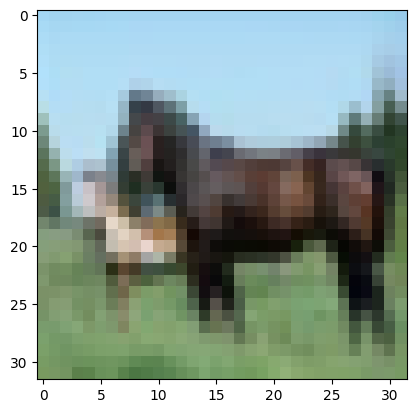

In [6]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/225

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [14]:
from keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# model = Sequential()

# ## FIRST SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# ## SECOND SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
# model.add(Flatten())

# # 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
# model.add(Dense(256, activation='relu'))

# # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
# model.add(Dense(10, activation='softmax'))


# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [ ]:
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [33]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam


cnn_model= Sequential([
    Conv2D(filters=32, kernel_size=7, activation='relu', input_shape= (32, 32, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=5, activation='relu', input_shape= (32, 32, 3)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])

cnn_model.compile(
    loss='categorical_crossentropy',#'sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [34]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        4736      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 32)          25632     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 2024)             

In [35]:
cnn_model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.8269 - accuracy: 0.3151
Epoch 2/10
1563/1563 [==============================] - 156s 100ms/step - loss: 1.4839 - accuracy: 0.4576
Epoch 3/10
1563/1563 [==============================] - 156s 100ms/step - loss: 1.3446 - accuracy: 0.5144
Epoch 4/10
1563/1563 [==============================] - 156s 100ms/step - loss: 1.2501 - accuracy: 0.5531
Epoch 5/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.1747 - accuracy: 0.5836
Epoch 6/10
1563/1563 [==============================] - 159s 102ms/step - loss: 1.1106 - accuracy: 0.6084
Epoch 7/10
1563/1563 [==============================] - 163s 104ms/step - loss: 1.0545 - accuracy: 0.6285
Epoch 8/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.9994 - accuracy: 0.6478
Epoch 9/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.9515 - accuracy: 0.6663
Epoch 10/10
1563/1563 [========================

In [ ]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [ ]:
# model.metrics_names

['loss', 'acc']

In [36]:
cnn_model.metrics_names

['loss', 'accuracy']

In [37]:
cnn_model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 13s 40ms/step - loss: 1.0056 - accuracy: 0.6498


[1.005550742149353, 0.6498000025749207]

In [40]:
from sklearn.metrics import classification_report
import numpy as np

# predictions = cnn_model.predict_classes(x_test)
predictions=cnn_model.predict(x_test) 
classes_x=np.argmax(predictions,axis=1)

313/313 [==============================] - 7s 22ms/step


In [ ]:
# model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 56us/step


[1.3332478387832642, 0.6444]

In [ ]:
# from sklearn.metrics import classification_report

# predictions = model.predict_classes(x_test)

In [41]:
print(classification_report(y_test,predictions))

ValueError: ignored

In [ ]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.59      0.68      1000
          1       0.83      0.76      0.80      1000
          2       0.44      0.65      0.52      1000
          3       0.50      0.40      0.44      1000
          4       0.50      0.75      0.60      1000
          5       0.52      0.57      0.54      1000
          6       0.70      0.74      0.72      1000
          7       0.88      0.56      0.69      1000
          8       0.82      0.74      0.78      1000
          9       0.81      0.68      0.74      1000

avg / total       0.68      0.64      0.65     10000



## Optional: Large Model

In [45]:

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= (32, 32, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= (32, 32, 3)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.25),
    Dense(1024, activation='relu'),
    Dropout(0.25),
    Dense(512, activation='relu'),
    Dropout(0.25),
    #20 is the number of outputs
    Dense(10, activation='softmax')  
])

cnn_model.compile(
    loss='categorical_crossentropy',#'',sparse_categorical_crossentropy
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [46]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 36)        5328      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 36)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 54)          48654     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 54)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 864)               0         
                                                                 
 dense_22 (Dense)            (None, 2024)             

In [47]:
cnn_model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 217s 138ms/step - loss: 1.6902 - accuracy: 0.3784
Epoch 2/20
1563/1563 [==============================] - 194s 124ms/step - loss: 1.3613 - accuracy: 0.5103
Epoch 3/20
1563/1563 [==============================] - 190s 122ms/step - loss: 1.2083 - accuracy: 0.5697
Epoch 4/20
1563/1563 [==============================] - 192s 123ms/step - loss: 1.0931 - accuracy: 0.6135
Epoch 5/20
1563/1563 [==============================] - 193s 123ms/step - loss: 0.9956 - accuracy: 0.6508
Epoch 6/20
1563/1563 [==============================] - 194s 124ms/step - loss: 0.9047 - accuracy: 0.6813
Epoch 7/20
1563/1563 [==============================] - 196s 126ms/step - loss: 0.8159 - accuracy: 0.7136
Epoch 8/20
1563/1563 [==============================] - 192s 123ms/step - loss: 0.7335 - accuracy: 0.7431
Epoch 9/20
1563/1563 [==============================] - 190s 122ms/step - loss: 0.6493 - accuracy: 0.7742
Epoch 10/20
1563/1563 [=======================

In [ ]:
# model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 75us/step


[0.9843294318199157, 0.6902]

In [48]:
cnn_model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.3991 - accuracy: 0.6719


[1.3991140127182007, 0.6718999743461609]

In [ ]:
# from sklearn.metrics import classification_report

# predictions = model.predict_classes(x_test)

In [49]:
from sklearn.metrics import classification_report
import numpy as np

# predictions = cnn_model.predict_classes(x_test)
predictions=cnn_model.predict(x_test) 
classes_x=np.argmax(predictions,axis=1)
print(classification_report(y_test,classes_x))

313/313 [==============================] - 15s 49ms/step
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.83      0.78      0.80      1000
           2       0.61      0.53      0.57      1000
           3       0.46      0.53      0.49      1000
           4       0.60      0.63      0.61      1000
           5       0.52      0.59      0.55      1000
           6       0.70      0.81      0.75      1000
           7       0.82      0.65      0.72      1000
           8       0.77      0.78      0.78      1000
           9       0.77      0.72      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [ ]:
# print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.61      0.70      1000
          1       0.77      0.88      0.82      1000
          2       0.64      0.57      0.60      1000
          3       0.66      0.30      0.41      1000
          4       0.66      0.67      0.66      1000
          5       0.45      0.81      0.58      1000
          6       0.80      0.75      0.77      1000
          7       0.76      0.69      0.72      1000
          8       0.78      0.81      0.80      1000
          9       0.75      0.82      0.79      1000

avg / total       0.71      0.69      0.69     10000



In [ ]:
# model.save('larger_CIFAR10_model.h5')

___